Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Roman Zhmurin"
COLLABORATORS = "razhmurin@edu.hse.ru"

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [3]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x = x0
    niter = 0
    while True:
        xPrev = x
        x = xPrev - f(xPrev)/fder(xPrev)
        niter += 1
        if (abs(x - xPrev) < eps or niter > maxiter):
            break
    return x, niter

In [4]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

### Your code here.

In [5]:
#Проверка по определению(не по заданию)
#def newton_iteration_graph(f, fder, x0, eps=1e-5, maxiter=100):
#    y_axis = np.array([log(abs(1.0 - x0))])
#    x_axis = np.array([log(1.0)])
#    x = x0
#    niter = 0
#    while True:
#        xPrev = x
#        x = xPrev - f(xPrev)/fder(xPrev)
#        niter += 1
#        y_axis = np.append(y_axis, log(abs(1.0 - x)))
#        x_axis = np.append(x_axis, log(abs(1.0 - xPrev)))
#        if (abs(x - xPrev) < eps or niter > maxiter):
#            break
#    return x, niter, y_axis, x_axis
#
#xx, nit, y_axis, x_axis = newton_iteration_graph(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
# x_axis = np.arange(0, nit + 1, 1)
#print(x_axis, y_axis)
#fig, ax = plt.subplots()
#ax.plot(x_axis, y_axis)
#ax.grid()
#plt.axis('square')
#plt.show()


In [6]:
def newton_iteration_graph(f, fder, x0, eps=1e-5, maxiter=100):
    y_axis = np.array([log(abs(1.0 - x0))])
    x = x0
    niter = 0
    while True:
        xPrev = x
        x = xPrev - f(xPrev)/fder(xPrev)
        niter += 1
        y_axis = np.append(y_axis, log(abs(1.0 - x)))
        if (abs(x - xPrev) < eps or niter > maxiter):
            break
    return x, niter, y_axis

[0 1 2 3 4 5 6] [  1.09861229   0.11778304  -1.21135291  -3.37651899  -7.47978065
 -15.6532727  -32.00060212]


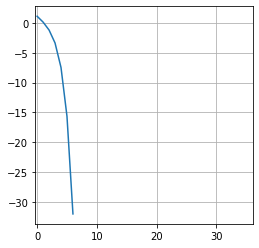

In [7]:
xx, nit, y_axis, = newton_iteration_graph(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
x_axis = np.arange(0, nit + 1, 1)
print(x_axis, y_axis)
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)
ax.grid()
plt.axis('square')
plt.show()

Сходимость метода квадратичная, так как с каждым шагом значение логарифма ошибки уменьшается примерно в два раза

# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [8]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x = x0
    niter = 0
    while True:
        xPrev = x
        x = xPrev - m * (f(xPrev) / fder(xPrev))
        niter += 1
        if (abs(x - xPrev) < eps or niter > maxiter):
            break
    return x, niter

In [9]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    
### BEGIN HIDDEN TESTS
num_iters = []

for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    num_iters.append(nit)
    
assert num_iters[3] < 10
assert all(_ > 10 for _ in num_iters[:3])
assert all(_ > 10 for _ in num_iters[4:])
### END HIDDEN TESTS

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

### Your code here.

In [10]:
for eps in [1e-7, 1e-5, 1e-3]:
    print('Итерация для eps =', eps, ':')    
    for m in [1, 2, 3, 4, 5, 6,]:
        xx, nit = mod_newton(lambda x: (x**2 - 1)**2,
                            lambda x: 2*(x**2 - 1) * 2 * x,
                            x0=2, m=m, maxiter=10000, eps=eps)
        print('m =', m, ':', xx, nit)
    print('\n')

Итерация для eps = 1e-07 :
m = 1 : 1.000000061169673 25
m = 2 : 1.000000000000001 5
m = 3 : 1.0000000167280612 24
m = 4 : 0.5 10001
m = 5 : -3.2440874569453264 10001
m = 6 : 0.3390583694222511 10001


Итерация для eps = 1e-05 :
m = 1 : 1.0000078296573287 18
m = 2 : 1.000000000000001 5
m = 3 : 0.9999978588127855 17
m = 4 : 0.5 10001
m = 5 : -3.2440874569453264 10001
m = 6 : 0.3390583694222511 10001


Итерация для eps = 0.001 :
m = 1 : 1.0010012015801961 11
m = 2 : 1.0000000464611474 4
m = 3 : 1.0002741477072696 10
m = 4 : 0.5 10001
m = 5 : -3.2440874569453264 10001
m = 6 : -0.9996615377277415 4951




Для m равной кратности корня требуется 4-5 итераций для разных фиксированных eps. Для m равной 1 или 3 требуется от 10 до 25 итераций. Для m равной 4,5,6 метод не сходится к нужному корню ни при каких значениях eps. Для m равной кратности корня сходимость квадратичная, для m равной 1 и 3 сходимость линейная, наблюдения согласуются.

# Часть III. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [11]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Производная `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    X = X0
    niter = 0
    while True:
        xPrev = X
        dX = np.linalg.solve(jcb(xPrev), -1.*F(xPrev))
        X = xPrev + dX
        niter += 1
        if (np.linalg.norm(X - xPrev) < eps or niter > maxiter):
            break
    return X, niter

In [12]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1, X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                       [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10


### BEGIN HIDDEN TESTS
def func(X):
    x,y,z=X
    return np.array([x**2+y**2+z**2-25, x*y+y*z+z*x-5,x+y-3])

def jac(X):
    x,y,z=X
    return np.array([[2*x, 2*y, 2*z], [y+z, x+z, x+y], [1, 1, 0]])

xx, nit = newton_system(func, jac, np.asarray([4., 0., 3.]))
assert_allclose(xx, np.array([0.5*(3+np.sqrt(12*np.sqrt(35)-47)),
                              0.5*(3-np.sqrt(12*np.sqrt(35)-47)), 
                              np.sqrt(35)-3]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 4., 3.]))
assert_allclose(xx, np.array([0.5*(3-np.sqrt(12*np.sqrt(35)-47)),
                              0.5*(3+np.sqrt(12*np.sqrt(35)-47)),
                              np.sqrt(35)-3]), atol=1e-5)
assert nit < 10
### END HIDDEN TESTS